### Laboratorio 1 (LAB1) 

## Práctica 1 - Self-Organising Maps

## Clasificar Colores

#### Inicialización y Declaración de librerías:

In [1]:
%reset

import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Dataset que se va a utilizar para el entrenamiento

In [2]:
# Código para obtener el dataset que se va a usar en el entrenamiento.
# Declaramos las variables de nuestro dataset.
valor_min = 0 
valor_max = 255
valores_color = 3 # Valores que tiene la entrada (RGB).
num_colores = 100

In [3]:
# Generamos el dataset de colores RGB aleatorios que se va a usar en el entrenamiento.
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores)).reshape(num_colores, 3)

# Mostramos todos los datos contenidos en el mismo.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"Mostrando datos del Dataset  ...")
print(chr(27)+"[1;30m"+"")

datos


Mostrando datos del Dataset  ...



array([[141,  46, 137],
       [ 10,  46, 188],
       [206,  49, 238],
       [ 82,  59, 121],
       [110,  55, 240],
       [ 22, 150,  94],
       [  0,   7, 134],
       [131, 159,  52],
       [143,  93,  79],
       [ 78,  17, 145],
       [109,  91,  18],
       [ 70, 170,  20],
       [240,  13, 244],
       [238,  80,  76],
       [136,  28,  90],
       [209,  83,  41],
       [ 80,  91, 124],
       [130,  66, 221],
       [219,  32, 193],
       [ 29, 216, 174],
       [177,  45,  62],
       [ 25,   5, 191],
       [ 88,  30, 253],
       [ 15,  74, 138],
       [147, 144, 174],
       [200,  23, 186],
       [ 70,  23,  42],
       [ 55, 130, 115],
       [ 47, 188, 123],
       [ 94,  75, 246],
       [ 62,  60,   9],
       [ 89, 162,  23],
       [170,  24, 197],
       [ 79, 159, 193],
       [ 67,  29, 201],
       [140,  32,  90],
       [ 22, 235,  29],
       [126,   5,  20],
       [152,  70, 156],
       [ 18,  17,  58],
       [ 70,   9, 155],
       [ 47, 143

## SOM Setup
#### Variables definidas por el alumno

In [4]:
# Inicializamos tamaño del mapa de Kohonen, número de iteraciones y learning rate.
# Inicializamos la variable booleana "normalizar_datos", dependiendo de si se quiere normalizar los datos o no.
lado_mapa = 26
periodo = 40000
learning_rate = 0.4942
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [5]:
# Establecemos el número de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utilizamos una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = valores_color
num_datos = num_colores

# Calculamos el vecindario inicial, que deberá ser la mitad del lado del mapa de Kohonen.
vecindario = lado_mapa/2

# Normalizamos los datos si fuese necesario, dividiendo cada dato por el máximo en la matriz.
if normalizar_datos:
    datos = datos / valor_max
    
# Creamos una matriz de pesos con valores aleatorizados entre 0 y 1, usando la función 
# "random.random" de la librería "numpy".
matriz_pesos = np.random.random((num_entradas*lado_mapa*lado_mapa)).reshape(lado_mapa,lado_mapa,num_entradas)

In [6]:
# Mostramos los valores de la matriz de pesos.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"Mostrando matriz de pesos...")
print(chr(27)+"[1;30m"+"")

matriz_pesos


Mostrando matriz de pesos...



array([[[0.34667461, 0.4469823 , 0.94308204],
        [0.54366576, 0.62879567, 0.10855543],
        [0.42753595, 0.5644181 , 0.85173576],
        ...,
        [0.71914179, 0.70477399, 0.14233144],
        [0.66261163, 0.79542565, 0.90582317],
        [0.68282784, 0.26043852, 0.56583796]],

       [[0.39726617, 0.12553308, 0.37214767],
        [0.47081063, 0.18115982, 0.01651701],
        [0.32770697, 0.25774117, 0.83524605],
        ...,
        [0.0788684 , 0.82389952, 0.7726743 ],
        [0.01154697, 0.41251349, 0.84202234],
        [0.4790359 , 0.71663696, 0.74253601]],

       [[0.35811476, 0.13130483, 0.25183563],
        [0.76320235, 0.72248411, 0.49793167],
        [0.75670411, 0.0647962 , 0.05335758],
        ...,
        [0.50382686, 0.69085973, 0.09543782],
        [0.17169034, 0.95628201, 0.45237606],
        [0.63593478, 0.92641824, 0.46669272]],

       ...,

       [[0.87873644, 0.50696719, 0.28703196],
        [0.6859809 , 0.93718498, 0.74639427],
        [0.31612668, 0

#### Funciones para entrenar/clasificar

In [7]:
# Función para calcular la distancia euclídea.
"""
    Calcula la i-ésima distancia euclídea entre pares de neuronas.
    Entradas: (Coordenadas Neurona 1, Coordenadas Neurona 2)
    Salidas: distancia para la iteración i. 
    
"""
def distancia_euclidea(array1, array2):
    distancia = 0
    for i in range(0, array1.shape[0]):
            distancia = distancia + (array1[i] - array2[i]) ** 2
    return distancia

In [8]:
# Función para encontrar la BMU (Best Matching Unit).
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_id) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bmu_id: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
    
    # Inicializamos las variables a utilizar.
    bmu_id = np.array([0, 0])
    bmu = np.array([None, None, None])
    distancia = None
    
    # Calculamos la distancia entre el patrón de entrada y cada una de las neuronas existentes en la capa de kohonen.    
    for x in range(0,m_pesos.shape[0]):
        for y in range(0,m_pesos.shape[1]):
            
            # Guardamos la matriz de pesos con sus coordenadas.
            w_pesos = m_pesos[x][y]
            distancia_tmp=0
            # Calculamos la distancia euclidea entre neuronas.
            for i in range(0, patron_entrada.shape[0]):
                distancia_tmp = distancia_tmp + (patron_entrada[i] - w_pesos[i]) ** 2
            
            # Comprobamos si la distancia entre neuronas es menor que la distancia euclidea calculada, para así 
            # poder determinar la posición de la BMU (Best Matching Unit, o neurona ganadora).
            if distancia == None or distancia_tmp < distancia:
                distancia = distancia_tmp
                bmu = w_pesos
                bmu_id = np.array([x, y])
    return (bmu, bmu_id)  
    

In [9]:
# Función para encontrar una segunda BMU, que posteriormente utilizaremos para calcular el error topológico.
"""
   Encuentra la segunda BMU a partir de la posición conocida de la primera BMU.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas, coordenadas_de_primera_BMU)
   Salidas:  (bmu, bmu_id) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bmu_id: coordenadas de la neurona ganadora
"""
def calcular_segunda_bmu(patron_entrada, m_pesos, m, coordenadas_bmu):
   
    # Inicializamos las variables a utilizar.
    bmu_id = np.array([0, 0])
    bmu = np.array([None, None, None])
    distancia = None
    
    # Calculamos la distancia entre el patrón de entrada y cada una de las neuronas existentes en la capa de kohonen.    
    for x in range(0,m_pesos.shape[0]):
        for y in range(0,m_pesos.shape[1]):
            
            # Guardamos la matriz de pesos con sus coordenadas.
            w_pesos = m_pesos[x][y]
            coordenadas2 = [x, y]
            distancia_tmp=0
            # Calculamos la distancia euclídea entre neuronas.
            for i in range(0, patron_entrada.shape[0]):
                distancia_tmp = distancia_tmp + (patron_entrada[i] - w_pesos[i]) ** 2

            # Comprobamos si la distancia entre neuronas es menor que la distancia euclidea calculada, para así poder 
            # determinar la posición de la segunda BMU (Best Matching Unit, o neurona ganadora).
            if distancia == None or distancia_tmp < distancia: 
                if np.array_equal(coordenadas2, coordenadas_bmu) == False:
                    distancia = distancia_tmp
                    bmu = w_pesos
                    bmu_id = np.array([x, y])
                    
    return (bmu, bmu_id) 

In [10]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial + ((-lr_inicial * i)/ n_iteraciones)

In [11]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    return 1 + vecindario_inicial * (1 - (i / n_iteraciones))

In [12]:
# Función para calcular la amortiguación del coeficiente de aprendizaje en función de la distancia a la BMU.
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU / (2* (vecindario_actual**2)))

#### Funciones para dibujar la salida de la red

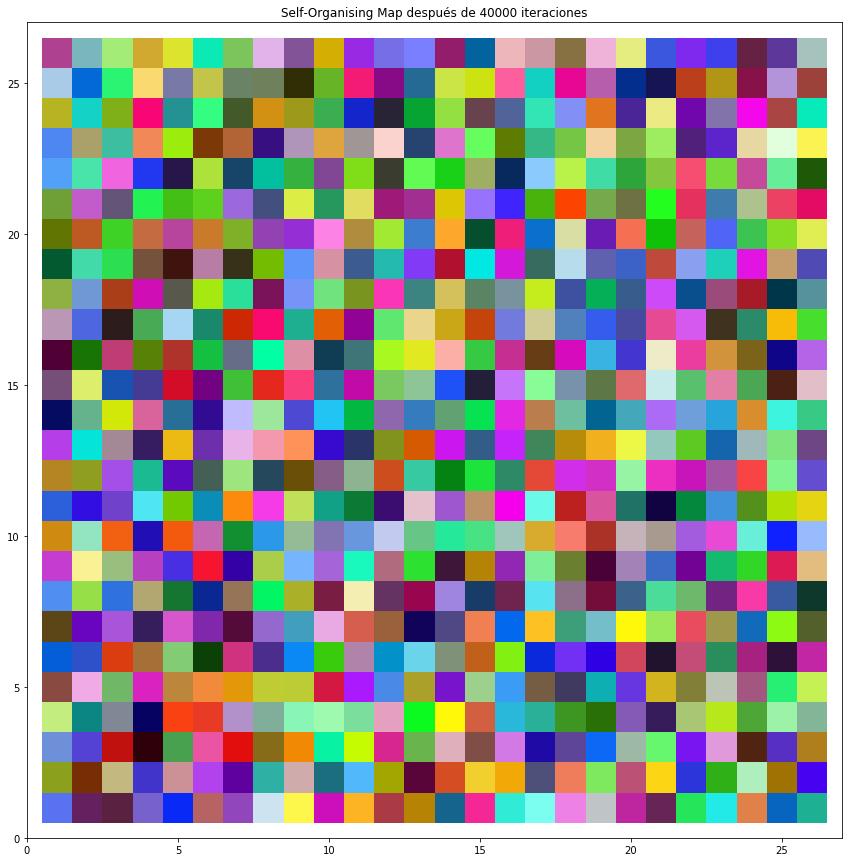

In [13]:
# Función para pintar una matriz de valores como colores RGB.

def pintar_mapa(matriz_valores, entrenado):
    fig = plt.figure(figsize=(25,15))
    
    # Establecemos los ejes.
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    if(entrenado):
        ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)
    else:
         ax.set_title('Self-Organising Map sin entrenar')
    # Dibujamos los rectángulos de color RGB.
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

In [14]:
# Función para calcular la distancia entre puntos (usada en el entrenamiento).

"""
   Calcula la distancia entre dos puntos x e y.
   Entradas: (punto_x, punto_y)
   Salidas:  distancia entre x e y
"""
def distancia(p1, p2):
    return ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2)

In [15]:
# Función para pintar un mapa en 3D sobre las activaciones de neuronas que se produzcan. 

def mapa3d(data):
    %matplotlib inline
    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    # Trabajamos con los datos de la matriz, estableciendo con ellos una malla de posiciones bidimensional.
    
    lx= len(data[0])            
    ly= len(data[:,0])
    xpos = np.arange(0,lx,1)    
    ypos = np.arange(0,ly,1)
    xpos, ypos = np.meshgrid(xpos+1, ypos+1)

    # A partir de las longitudes de las posiciones "x" (filas) e "y" (columnas), 
    # obtenemos una tercera, "z" (Número de activaciones), para así poder representarlas en el mapa 3D.
    
    xpos = xpos.flatten()   
    ypos = ypos.flatten()
    zpos = np.zeros(lx*ly)

    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = data.flatten()

    cs= sns.color_palette("GnBu_d", lado_mapa)*ly
    ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=cs)

    ax.set_xlabel('Filas')
    ax.set_ylabel('Columnas')
    ax.set_zlabel('Nº de activaciones')

    plt.show()

In [16]:
# Función para calcular el error topológico.

"""
   Calcula el error topológico dado en la clasificación del SOM.
   Entradas: (número_activaciones, nivel_de_homogeneidad)
   Salidas:  error topológico de la clasificación
"""     
def error_topologico(N, homogeneidad):
    return 1/N*homogeneidad

## SOM Entrenamiento


-----------SOM entrenamiento----------

Sin Entrenar:



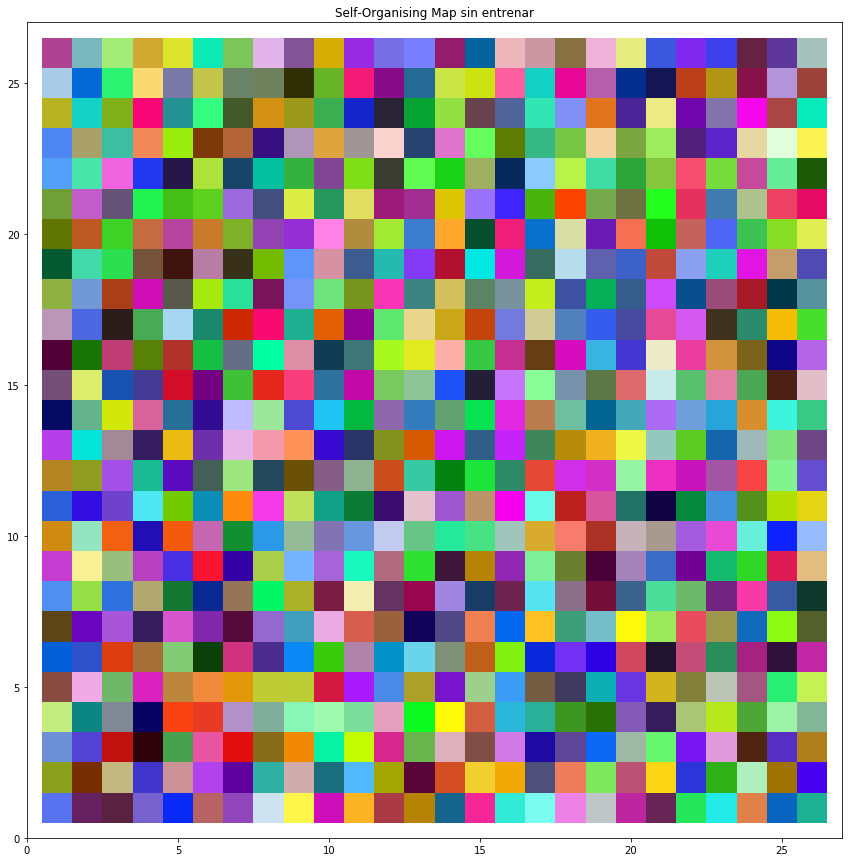


Realizando entrenamiento...........

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800


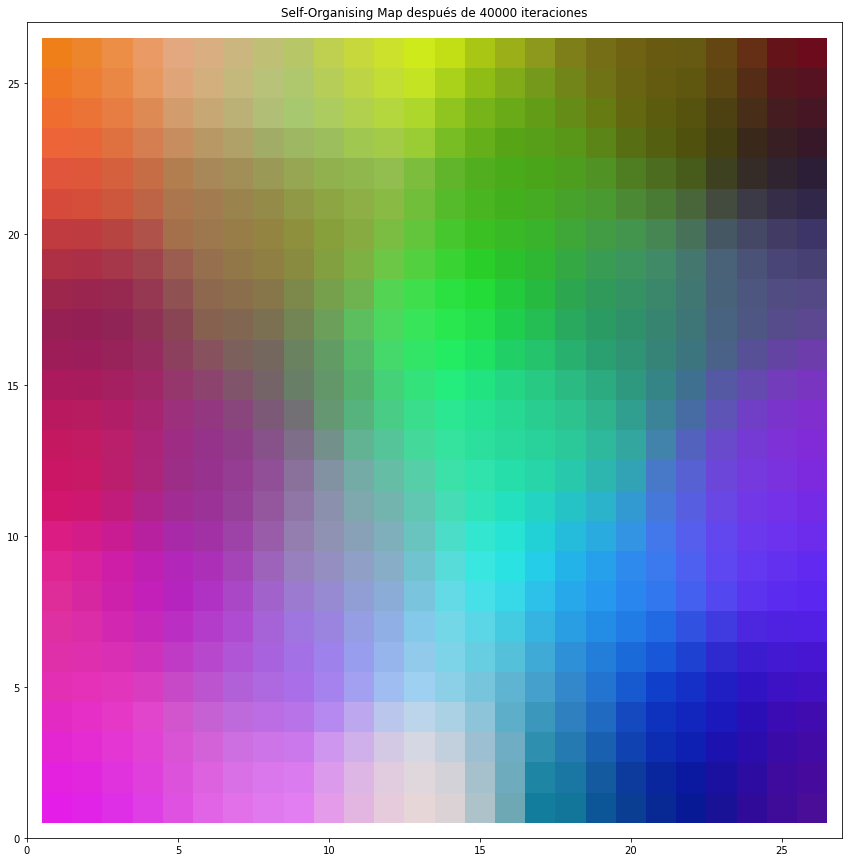

In [17]:
# Dibujamos la matriz de pesos iniciales como un mapa de colores RGB.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------SOM entrenamiento----------")
print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"Sin Entrenar:")
print(chr(27)+"[1;30m"+"")
pintar_mapa (matriz_pesos,False)

# Entrenamos la red con el dataset de entrenamiento.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"Realizando entrenamiento...........")
print(chr(27)+"[1;30m"+"")

# Bucle principal del algoritmo de entrenamiento.

for iteracion in range(0, periodo):
    
    # Condicional para ver el número de iteraciones que realiza.
    
    if (iteracion % 100 == 0):
        print(iteracion)
    
    # Se obtienen colores del dataset utilizado para entrenamiento.
    
    it = datos[np.random.randint(0, num_colores-1)]
    
    # Calculamos la BMU (Best Matching Unit).
    
    bmu = calcular_bmu (it, matriz_pesos, num_entradas)
    
    # Obtenemos la "id" de la BMU.
    
    bmu_id = bmu[1]
    
    # Calculamos el vecindario.
    
    variacion_v = variacion_vecindario (vecindario, iteracion, periodo)
    
    # Calculamos ETA (coeficiente de aprendizaje).
    
    variacion_eta = variacion_learning_rate (learning_rate , iteracion, periodo)
    
    # Con todos los datos necesarios ya calculados, realizamos el entrenamiento.
    
    for x in range(0,matriz_pesos.shape[0]):
        for y in range(0,matriz_pesos.shape[1]):
            if (distancia([x,y], bmu_id) <= vecindario) :
                
                # Calculamos la amortiguación de ETA (coeficiente de aprendizaje).
                calc_decay = decay(distancia([x,y],bmu_id),variacion_v)
                
                # Guardamos en la matriz de pesos el cálculo para el entrenamiento.
                matriz_pesos[x][y] = matriz_pesos[x][y] + variacion_eta*calc_decay*(it-matriz_pesos[x][y])
        

# Mostramos el mapa de colores a través de la matriz de pesos ya entrenada.
           
print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"¡Entrenamiento completado!")
print(chr(27)+"[1;30m"+"")

pintar_mapa (matriz_pesos,True)

## SOM Clasificación


-----------SOM Clasificación----------


-----------Mapa de Clasificación:----------



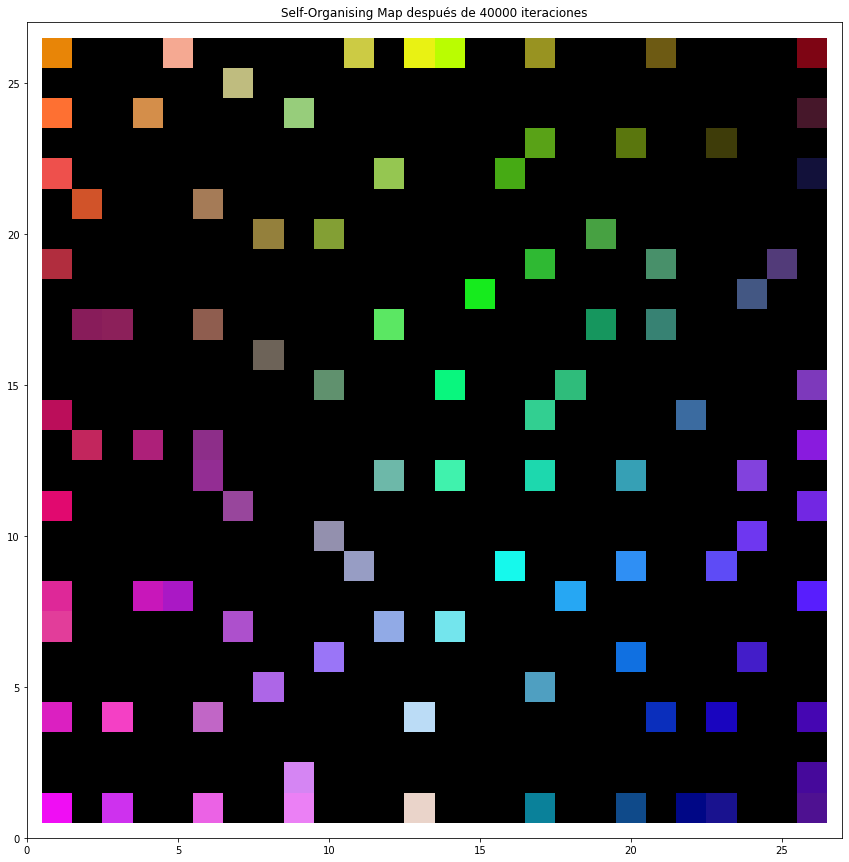


-----------Mapa de Activaciones:----------



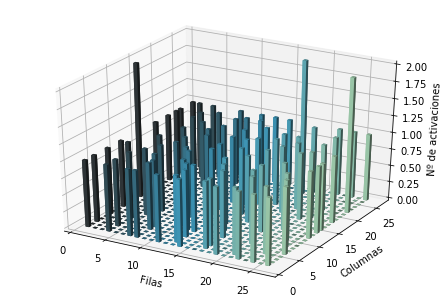

[[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0.]
 [2.

In [18]:
# Clasificamos los patrones de entrenamiento con la matriz de pesos recién entrenada.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------SOM Clasificación----------")
print(chr(27)+"[1;30m"+"")

clasificacion = np.copy(matriz_pesos) *0

# Mapa de activaciones (Contabilizar los patrones ha reconocido cada neurona).
activaciones = np.zeros((lado_mapa,lado_mapa))

# Mapa de distancias (Distancia entre la BMU y el patrón).
distancias = np.copy(activaciones)
distancia_media = 0
contActivaciones = 0
homogeneidad = 0


for iteracion in range(0, datos.shape[0]):
    
    # Guardamos la BMU (Best Matching Unit).
    bmu = calcular_bmu(datos[iteracion], matriz_pesos, num_entradas)
    
    # Calculamos la segunda BMU para el error topológico.
    bmu2 = calcular_segunda_bmu(datos[iteracion], matriz_pesos, num_entradas, bmu[1])
    if distancia_euclidea(bmu[1], bmu2[1]) > 2:
        homogeneidad += 1
        
    # Obtenemos las coordenadas de la BMU.
    coordenadas=bmu[1]
    # Coordenada x.
    bmux=coordenadas[0]
    # Coordenada y.
    bmuy=coordenadas[1]
    # Guardamos los pesos.
    pesos=bmu[0]
    
    # Mapa de clasificación.
    clasificacion[bmux, bmuy] = datos[iteracion] #pesos #datos[iteracion] 
    
    distancias[bmux][bmuy]+=round(distancia_euclidea(pesos,datos[iteracion]),4)
    
    activaciones[bmux][bmuy] +=1

# Sacamos la distancia media de cada neurona a partir del número de activaciones.
for i in range(0,lado_mapa):
    for j in range(0,lado_mapa): 
        if activaciones[i-1][j-1] != 0:
            distancias[i-1][j-1]=distancias[i-1][j-1] / activaciones[i-1][j-1]
            
            # Calculamos la distancia media total.
            distancia_media += distancias[i-1][j-1]
            contActivaciones +=1

# Contabilizamos el número de clases.
distancia_media=distancia_media/contActivaciones

# Imprimimos los mapas de activaciones, distancias, número de clases y distancia media total.

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Mapa de Clasificación:----------")
print(chr(27)+"[1;30m"+"")
pintar_mapa (clasificacion,True)

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Mapa de Activaciones:----------")
print(chr(27)+"[1;30m"+"")
mapa3d(activaciones)
print(activaciones) 

print(chr(27)+"[1;30m"+"") 
print(chr(27)+"[1;35m"+"-----------Mapa de Distancias:----------")
print(chr(27)+"[1;30m"+"")
print(distancias)

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Activaciones(clases):----------")
print(chr(27)+"[1;30m"+"")
print(contActivaciones) 

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Error de cuantificación:----------")
print(chr(27)+"[1;30m"+"")
print(distancia_media) 

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Error topológico:----------")
print(chr(27)+"[1;30m"+"")
print(error_topologico(contActivaciones, homogeneidad))

## SOM Prueba


-----------Mapa de Clasificación:----------


-----------SOM Prueba:----------


-----------Clasificando colores...----------

Color clasificado en la coordenada: (12,1)
Colores clasificados: 


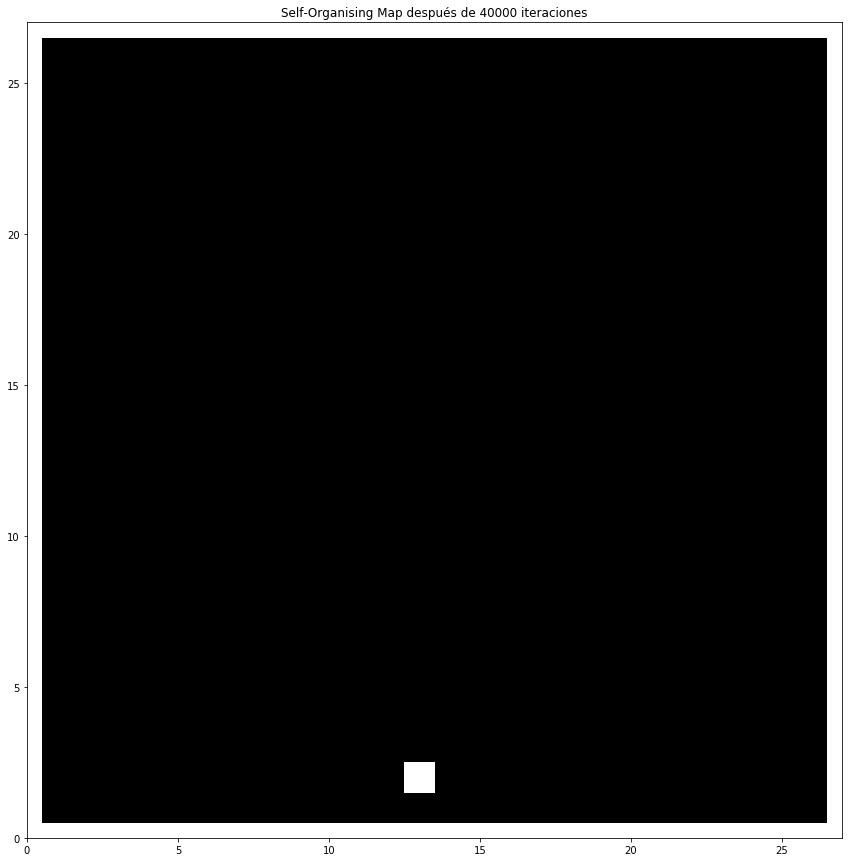

Color clasificado en la coordenada: (0,20)
Colores clasificados: 


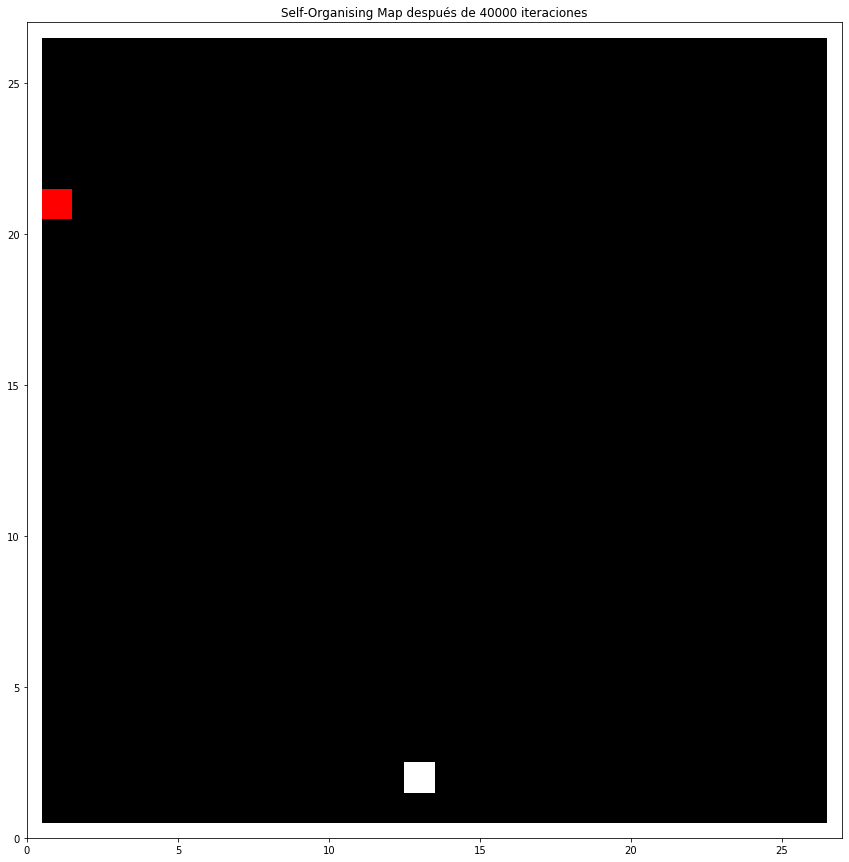

Color clasificado en la coordenada: (14,17)
Colores clasificados: 


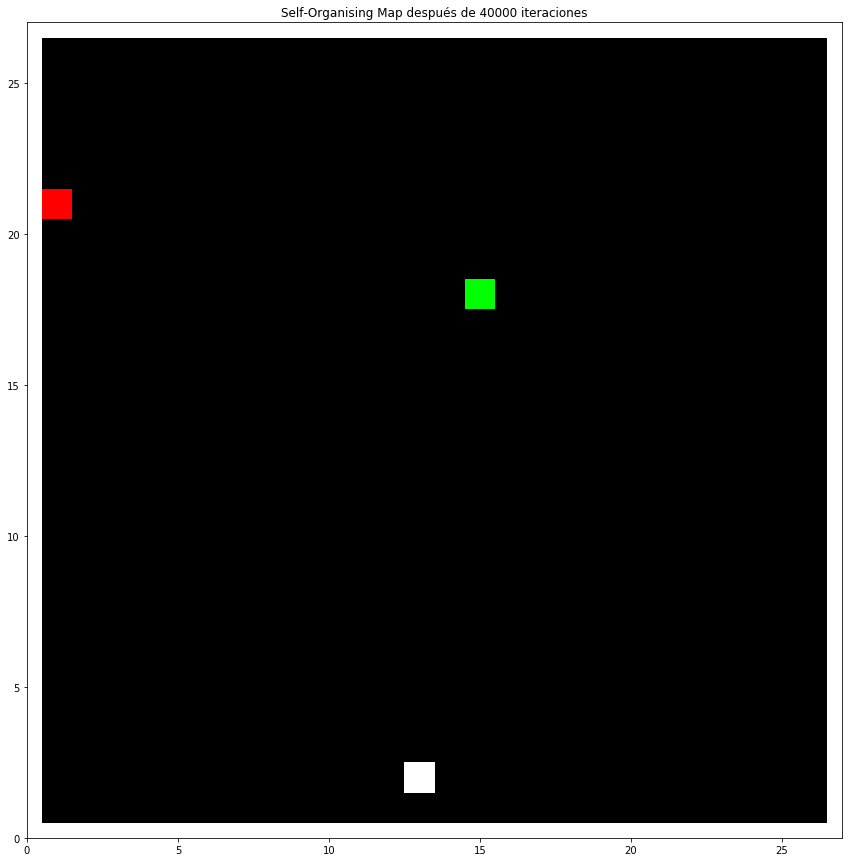

Color clasificado en la coordenada: (22,4)
Colores clasificados: 


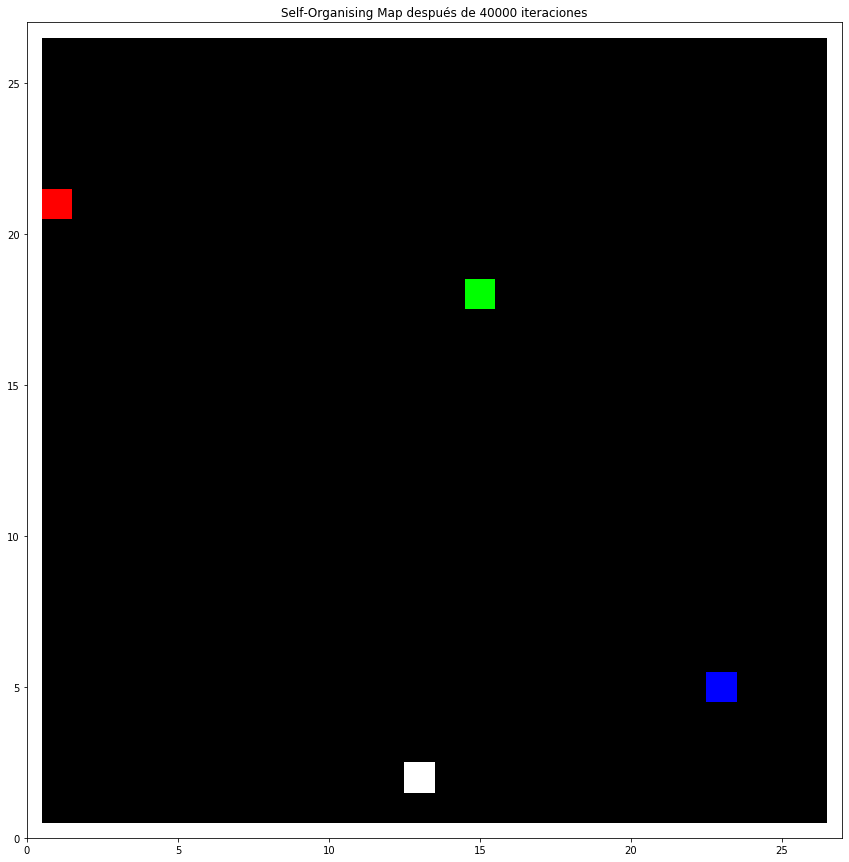

Color clasificado en la coordenada: (12,25)
Colores clasificados: 


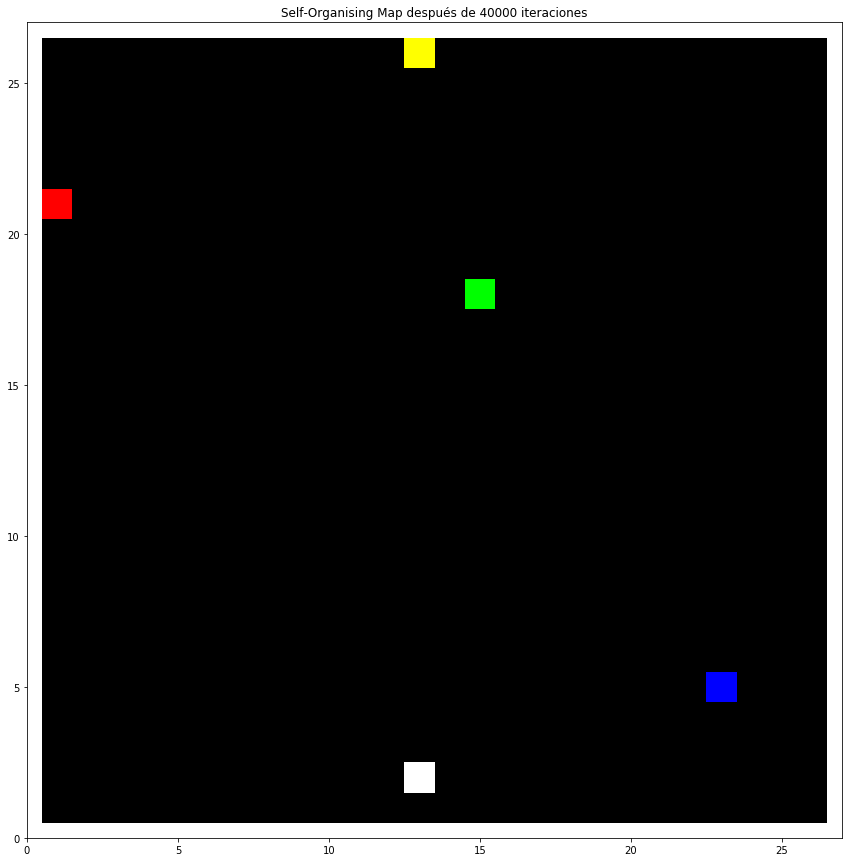

Color clasificado en la coordenada: (15,8)
Colores clasificados: 


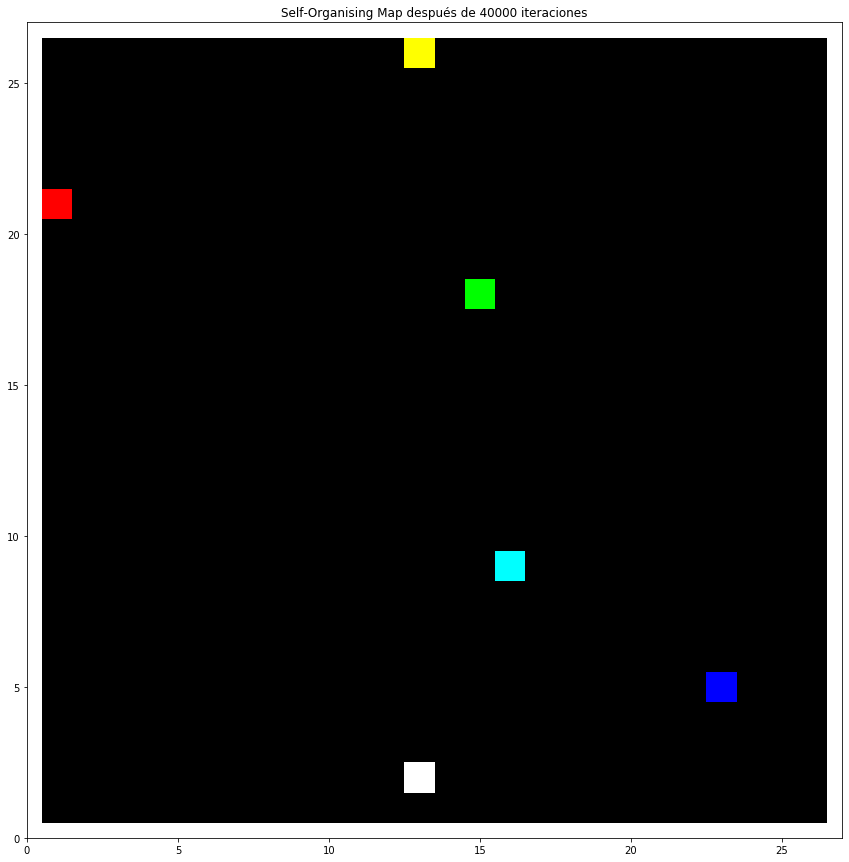

In [19]:
print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Mapa de Clasificación de SOM Prueba:----------")
print(chr(27)+"[1;30m"+"")

print(chr(27)+"[1;30m"+"")
print(chr(27)+"[1;35m"+"-----------Clasificando colores...----------")
print(chr(27)+"[1;30m"+"")

# Realizamos la clasificación de nuevos patrones, en este caso, del siguiente dataset de prueba (Colores primarios).

colores = np.array([[255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255]])
mapa = np.copy(matriz_pesos) *0

# Inicializamos la matriz de pesos.
clasificacion = np.copy(matriz_pesos) *0

for iteracion in range(0, colores.shape[0]):
    
    # Guardamos los colores.
    color=colores[iteracion]
    bmu = calcular_bmu((color/valor_max),matriz_pesos, num_entradas)
    
    # Obtenemos las coordenadas de la BMU.
    coordenadas=bmu[1]
    # Coordenada x.
    bmux=coordenadas[0]
    # Coordenada y.
    bmuy=coordenadas[1]
    
    # Una vez obtenida la BMU correspondiente, clasificamos los colores.
    mapa[bmux][bmuy] = bmu[0]
    clasificacion[bmux][bmuy] = (color/valor_max)
    print("Color clasificado en la coordenada: ("+str(bmux)+","+str(bmuy)+")")
    
    # Imprimimos el mapa de colores primarios ya clasificados.
    print("Colores clasificados: ")
    pintar_mapa(clasificacion,True)